# Part 2: Trial sucess through time
- This notebook is continues from Part 1
- Here I wish to visualize the relationship between a trial's success (indicated by a small p-value) and time 

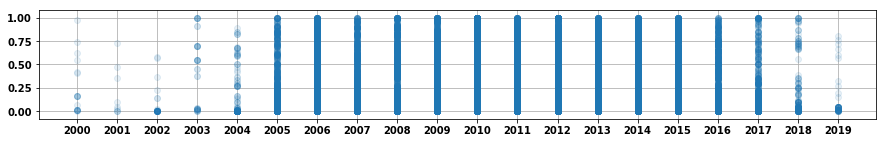

In [16]:
plt.figure(figsize=(15,2))
plt.scatter(df['year'], df['p_value'], alpha=0.1)
_ = plt.xticks(sorted(df['year'].unique()))

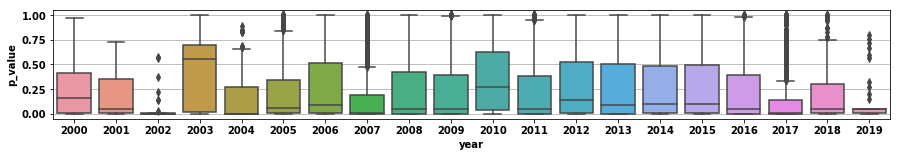

In [17]:
plt.figure(figsize=(15,2))
sns.boxplot(df['year'], df['p_value'])

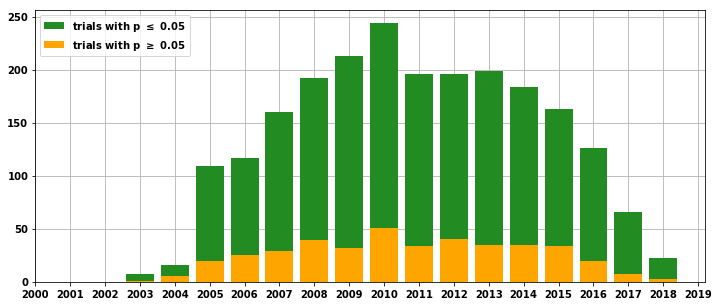

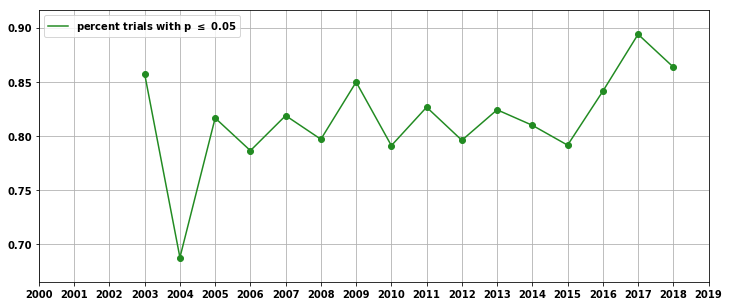

In [18]:
df['min_pvalue'] = df.groupby(['nct_id'])['p_value'].transform('min')
df['has_p≤0.05'] = df['min_pvalue'] <= 0.05
n_significant_by_year = df.groupby(['year','has_p≤0.05'])['nct_id'].nunique().unstack()

plt.figure(figsize=(12,5))

for i, row in n_significant_by_year.iterrows(): #add a legend or remove picture!
    plt.bar(i, row[False]+row[True], color='forestgreen')
    plt.bar(i, row[False], color='orange')

_ = plt.xticks(subset.columns)
plt.legend(['trials with p $\leq$ 0.05','trials with p $\geq$ 0.05'],loc='upper left')



plt.figure(figsize=(12,5))
perc_positive = n_significant_by_year[True]/(n_significant_by_year[False]+n_significant_by_year[True])

plt.scatter(perc_positive.index.tolist(), perc_positive.values, color='forestgreen')
plt.plot(perc_positive.index.tolist(), perc_positive.values, color='forestgreen')
plt.legend(['percent trials with p $\leq$ 0.05'])
    
    
_ = plt.xticks(subset.columns)

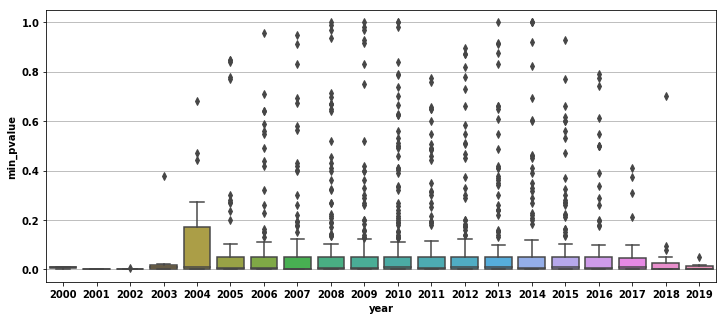

In [19]:
nct_pvalues = df.drop_duplicates(subset='nct_id')[['nct_id','year','min_pvalue']].dropna()

plt.figure(figsize=(12,5))
sns.boxplot(data=nct_pvalues, x='year', y='min_pvalue')

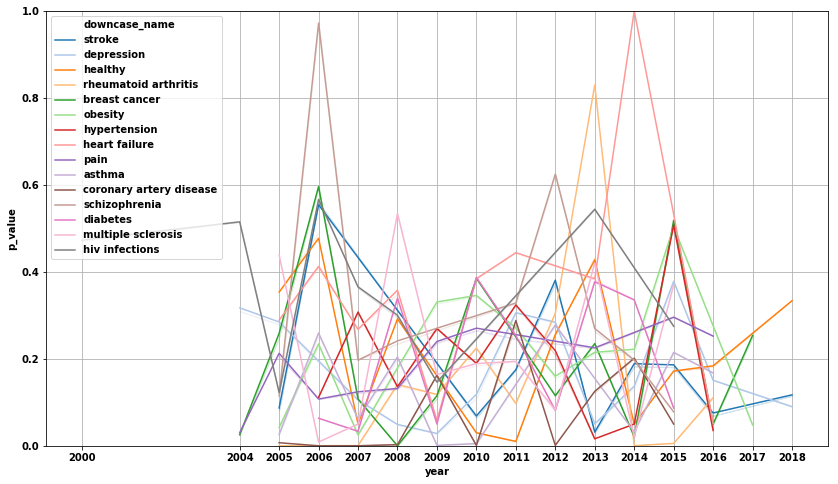

In [20]:
temp=df[df['downcase_name'].isin(downcase_name_by_popularity[0:15])]
plt.figure(figsize=(14,8))
sns.lineplot(x='year',
             y='p_value',
             hue='downcase_name',
             palette='tab20',
            # hue_order=disease_order,
             ci=False,
             legend='full',
             data=temp)

plt.xticks(sorted(temp.year.unique()))
plt.ylim(0,1)
plt.legend(loc='upper left')
#put legend in the correct place
#locs, labels = xticks()
#_ = plt.xticks(temp.columns['year'].astype('int'))
#fix x-axis
#plt.xlim(1999,2019)

In [21]:
temp.head()

,id,nct_id,outcome_id,non_inferiority_type,non_inferiority_description,param_type,param_value,dispersion_type,dispersion_value,p_value_modifier,...,method_description,estimate_description,groups_description,other_analysis_description,intervention_name,study_first_submitted,year,downcase_name,min_pvalue,has_p≤0.05
175,1159000,NCT03559829,2110241,Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,RAPAEL Smart Glove,2018-06-01,2018,stroke,0.01,True
176,1159001,NCT03559829,2110242,Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,RAPAEL Smart Glove,2018-06-01,2018,stroke,0.01,True
177,1159002,NCT03559829,2110243,Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,RAPAEL Smart Glove,2018-06-01,2018,stroke,0.01,True
178,1159003,NCT03559829,2110244,Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,RAPAEL Smart Glove,2018-06-01,2018,stroke,0.01,True
179,1159004,NCT03559829,2110245,Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,RAPAEL Smart Glove,2018-06-01,2018,stroke,0.01,True


In [22]:
#ok, so I don't see what's up with the 
temp.groupby('downcase_name')['p_value'].mean()

downcase_name
asthma                     0.089777
breast cancer              0.349698
coronary artery disease    0.159203
depression                 0.199659
diabetes                   0.365682
healthy                    0.264106
heart failure              0.314887
hiv infections             0.277343
hypertension               0.201472
multiple sclerosis         0.212799
obesity                    0.235593
pain                       0.205479
rheumatoid arthritis       0.181548
schizophrenia              0.235595
stroke                     0.169842
Name: p_value, dtype: float64

In [23]:
#ok, so that is interesting, now I want to color the plots somehow...
# I want to see if there is a year specific component to the odd humps in the data
# so, I want to give each point a year specific color
p=sns.color_palette("tab20") # maybe use a sequential palette?
c_dict=dict()
r=range(2000,2020)
for i,j in zip(r,range(0,len(r))):
    c_dict[i]=j

In [24]:
nct_pvalues['year_color']=[c_dict[i] for i in nct_pvalues['year']]

(0, 2500)

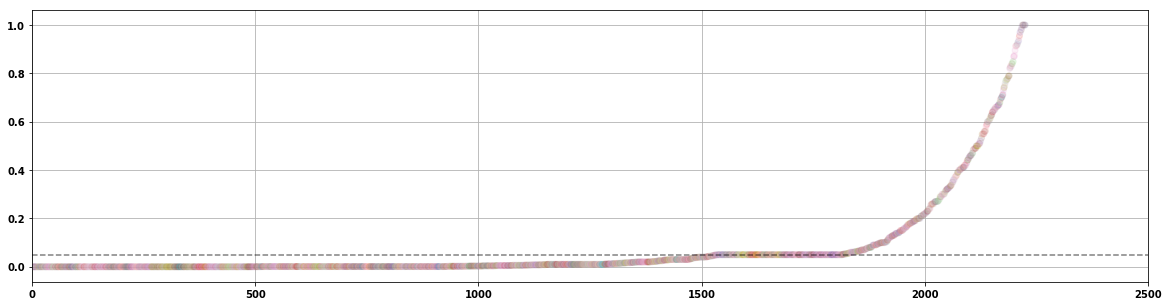

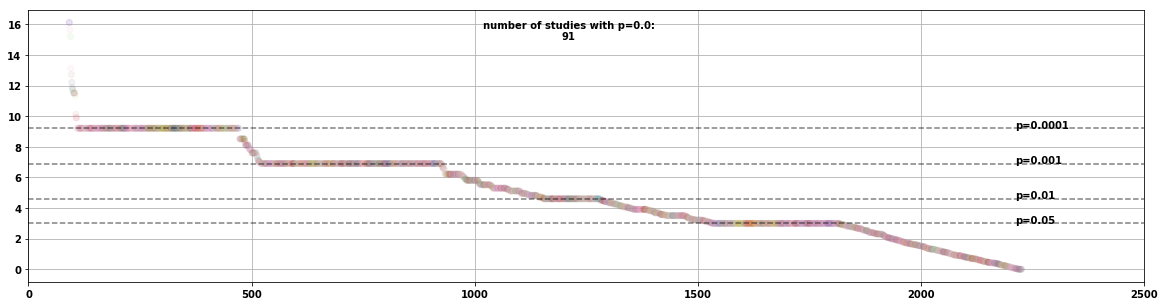

In [26]:
plt.figure(figsize=(20,5))
plt.scatter(range(nct_pvalues.shape[0]),nct_pvalues['min_pvalue'].sort_values(), alpha=0.1, c=[c_dict[i] for i in nct_pvalues.sort_values('min_pvalue')['year']], cmap='tab20')
plt.plot([0,12000], [0.05,0.05], 'k--',alpha=0.5)
plt.xlim(0,2500)


plt.figure(figsize=(20,5))
plt.scatter(range(nct_pvalues.shape[0]),nct_pvalues['min_pvalue'].sort_values().apply(lambda x: -np.log(x)), alpha=0.1,c=[c_dict[i] for i in nct_pvalues.sort_values('min_pvalue')['year']], cmap='tab20')

for pvalue in nct_pvalues['min_pvalue'].value_counts().index.tolist()[:5]:
    if pvalue==0:
        plt.text(1210, 15, 'number of studies with p=0.0:\n{}'.format((nct_pvalues['min_pvalue']==0).sum()), ha='center')
        continue
    plt.plot([0,2500], [-np.log(pvalue),-np.log(pvalue)], 'k--',alpha=0.5)
    plt.text(2210, -np.log(pvalue), 'p={}'.format(pvalue))
plt.xlim(0,2500)

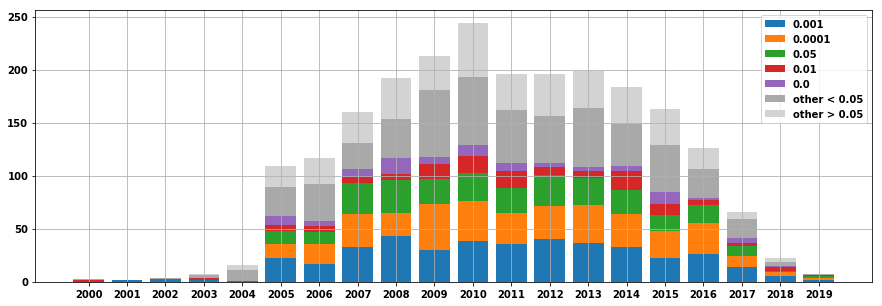

In [27]:
popular_pvalues = nct_pvalues['min_pvalue'].value_counts().index.tolist()[:5]

value_stack = {year:0 for year in sorted(nct_pvalues['year'].unique())}

def update_stack(row):
    value_stack[row['year']] += row['nct_id']

    

plt.figure(figsize=(15,5))    
    
for i, pval in enumerate(popular_pvalues):
    subset = nct_pvalues[nct_pvalues['min_pvalue']==pval].groupby('year')['nct_id'].nunique().reset_index()
    subset.apply(update_stack,axis=1)
    years, values = zip(*list(value_stack.items()))
    plt.bar(years,values, zorder=-i, label=pval)

    
i +=1    
non_pop_still_sig = nct_pvalues[
                                    (~nct_pvalues['min_pvalue'].isin(popular_pvalues)) & 
                                    (nct_pvalues['min_pvalue']<0.05)
    
                               ].groupby('year')['nct_id'].nunique().reset_index()
  
non_pop_still_sig.apply(update_stack,axis=1) 
years, values = zip(*list(value_stack.items()))
plt.bar(years,values, zorder=-i, label='other < 0.05', color='darkgrey')
    
all_pvals = nct_pvalues.groupby('year')['nct_id'].nunique().reset_index()
plt.bar(all_pvals['year'], all_pvals['nct_id'], label='other > 0.05', color='lightgrey', zorder=-(i+1))    
plt.legend()   
_ = plt.xticks( sorted(nct_pvalues['year'].unique()))